In [4]:
import pandas as pd 

In [5]:
d = pd.read_csv('anime.csv')
d.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [6]:
df =pd.DataFrame(d)

In [7]:
rating_description = df['rating'].describe()
print(rating_description)

count    12064.000000
mean         6.473902
std          1.026746
min          1.670000
25%          5.880000
50%          6.570000
75%          7.180000
max         10.000000
Name: rating, dtype: float64


In [8]:
missing_values = df.isnull().sum()
missing_values

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [9]:
df_cleaned = df.dropna()

In [10]:
missing_values = df_cleaned.isnull().sum()
missing_values

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [11]:
variable_descriptions = df.dtypes
dimensions = df.shape
print(variable_descriptions)
dimensions

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object


(12294, 7)

In [12]:
anime_df_encoded = pd.get_dummies(df, columns=['type'])
anime_df_encoded.head()

,anime_id,name,genre,episodes,rating,members,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",1,9.37,200630,True,False,False,False,False,False
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",64,9.26,793665,False,False,False,False,False,True
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",51,9.25,114262,False,False,False,False,False,True
3,9253,Steins;Gate,"Sci-Fi, Thriller",24,9.17,673572,False,False,False,False,False,True
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",51,9.16,151266,False,False,False,False,False,True


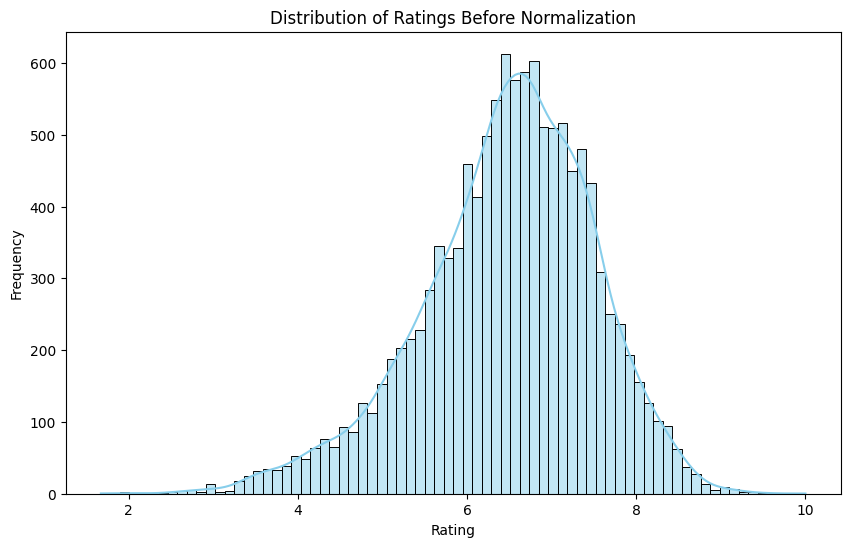

Range of Ratings: 8.33


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the histogram of the 'rating' column before normalization
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], kde=True, color='skyblue')
plt.title('Distribution of Ratings Before Normalization')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Check if normalization is required
# If the range of values is significantly large, normalization might be beneficial
rating_range = df['rating'].max() - df['rating'].min()
print("Range of Ratings:", rating_range)



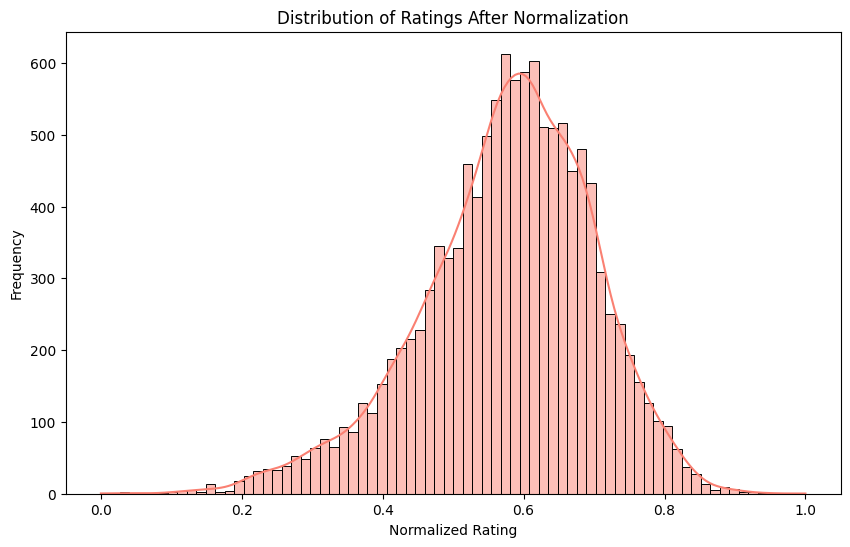

In [14]:

from sklearn.preprocessing import MinMaxScaler
df['rating_normalized'] = MinMaxScaler().fit_transform(df[['rating']])

plt.figure(figsize=(10, 6))
sns.histplot(df['rating_normalized'], kde=True, color='salmon')
plt.title('Distribution of Ratings After Normalization')
plt.xlabel('Normalized Rating')
plt.ylabel('Frequency')
plt.show()

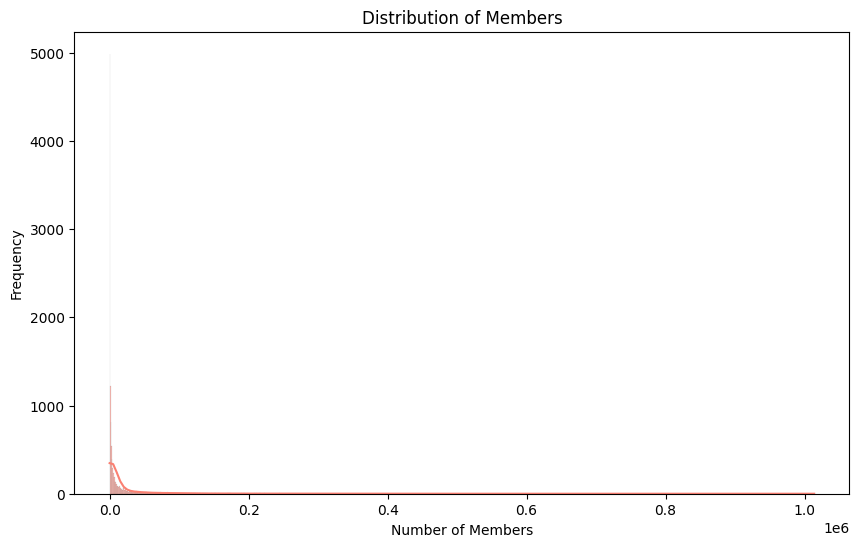

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['members'], kde=True, color='salmon')
plt.title('Distribution of Members')
plt.xlabel('Number of Members')
plt.ylabel('Frequency')

plt.show()

Range of Members: 1013912


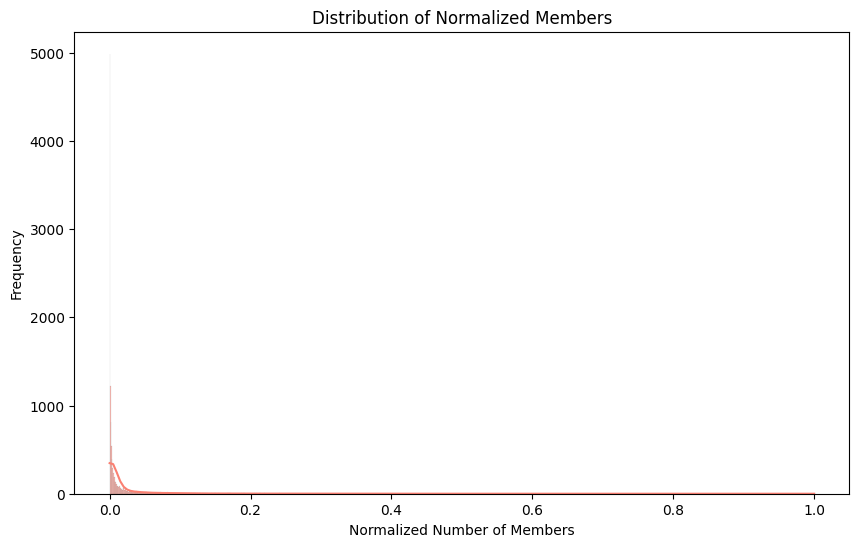

Range of Members: 1.0


In [16]:
from sklearn.preprocessing import MinMaxScaler


members_range = df['members'].max() - df['members'].min()
print("Range of Members:", members_range)


df['members_normalized'] = MinMaxScaler().fit_transform(df[['members']])


plt.figure(figsize=(10, 6))
sns.histplot(df['members_normalized'], kde=True, color='salmon')
plt.title('Distribution of Normalized Members')
plt.xlabel('Normalized Number of Members')
plt.ylabel('Frequency')

plt.show()
members_range = df['members_normalized'].max() - df['members_normalized'].min()
print("Range of Members:", members_range)


In [17]:
df['members'].max()

1013917

In [18]:
df['members'].min()

5

In [21]:
d['type']=d['type'].astype('category')
d['type']=d['type'].cat.codes
d

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",1,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",6,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",6,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",6,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",6,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,4,1,4.15,211
12290,5543,Under World,Hentai,4,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,4,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,4,1,4.98,175


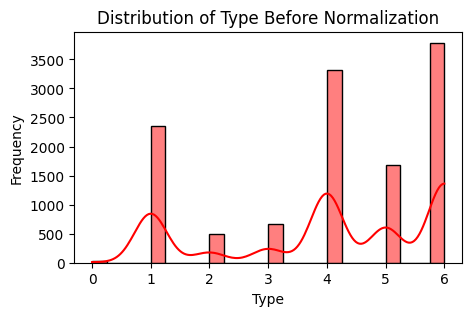

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the histogram of the 'rating' column before normalization
plt.figure(figsize=(5, 3))
sns.histplot(d['type'], kde=True, color='red')
plt.title('Distribution of Type Before Normalization')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.show()